## News Article Classification Model

### Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

import os
print(os.listdir('../code'))
# print(os.listdir('../dataset'))

['.ipynb_checkpoints', 'news-classifier.ipynb']


In [8]:
TRAIN_PATH = os.path.join('../dataset/', 'BBC News Train.csv')

df = pd.read_csv(TRAIN_PATH)
df.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [9]:
"""
    pd.factorize() returns numeric representation of unique values
    in array as param1 and the unique values themselves as param 2
"""
df['category_id'], _ = df['Category'].factorize()
df['category_id'][0 : 10]
df.head(20)

ArticleId                                               Text  \
0        1833  worldcom ex-boss launches defence lawyers defe...   
1         154  german business confidence slides german busin...   
2        1101  bbc poll indicates economic gloom citizens in ...   
3        1976  lifestyle  governs mobile choice  faster  bett...   
4         917  enron bosses in $168m payout eighteen former e...   
5        1582  howard  truanted to play snooker  conservative...   
6         651  wales silent on grand slam talk rhys williams ...   
7        1797  french honour for director parker british film...   
8        2034  car giant hit by mercedes slump a slump in pro...   
9        1866  fockers fuel festive film chart comedy meet th...   
10       1683  blair rejects iraq advice calls tony blair has...   
11       1153  housewives lift channel 4 ratings the debut of...   
12       1028  uk coal plunges into deeper loss shares in uk ...   
13        812  bp surges ahead on high oil price oil giant bp...   
14        707  ireland 21-19 argentina an injury-time dropped...   
15       1588  wenger signs new deal arsenal manager arsene w...   
16        342  u2 s desire to be number one u2  who have won ...   
17        486  hantuchova in dubai last eight daniela hantuch...   
18       1344  melzer shocks agassi in san jose second seed a...   
19       1552  moving mobile improves golf swing a mobile pho...   

         Category  category_id  
0        business            0  
1        business            0  
2        business            0  
3            tech            1  
4        business            0  
5        politics            2  
6           sport            3  
7   entertainment            4  
8        business            0  
9   entertainment            4  
10       politics            2  
11  entertainment            4  
12       business            0  
13       business            0  
14          sport            3  
15          sport            3  
16  entertainment            4  
17          sport            3  
18          sport            3  
19           tech            1

In [10]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

Category  category_id
0       business            0
3           tech            1
5       politics            2
6          sport            3
7  entertainment            4

In [13]:
category_to_id = dict (category_id_df.values)
id_to_category = dict (category_id_df[['category_id', 'Category']].values)
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [14]:
category_to_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [15]:
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

<AxesSubplot:xlabel='Category'>

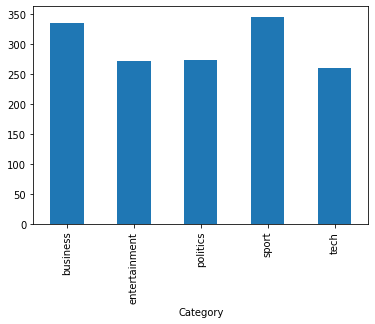

In [16]:
df.groupby('Category').category_id.count().plot.bar()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

"""
    TF-IDF (term frequency-inverse document frequency)
    is a text vectorizer. 
"""

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray()

labels = df.category_id

In [22]:
features.shape

(1490, 9927)

In [23]:
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [25]:
sorted_category_to_id_items = sorted(category_to_id.items())
sorted_category_to_id_items

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [28]:
labels

0       0
1       0
2       0
3       1
4       0
       ..
1485    4
1486    4
1487    0
1488    1
1489    1
Name: category_id, Length: 1490, dtype: int64

In [37]:
from sklearn.feature_selection import chi2

# We'll look for the top N categories
N = 3

for Category, category_id in sorted_category_to_id_items:
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(f"# {Category.capitalize()}:")
    print(f"\t. Most correlated unigrams:\n\t. {unigrams[-N:]}")
    print(f"\n\t. Most correlated bigrams:\n\t. {bigrams[-N:]}")
    print('\n')

# Business:
	. Most correlated unigrams:
	. ['growth', 'bank', 'shares']

	. Most correlated bigrams:
	. ['stock market', 'economic growth', 'analysts said']


# Entertainment:
	. Most correlated unigrams:
	. ['singer', 'actor', 'film']

	. Most correlated bigrams:
	. ['won best', 'los angeles', 'box office']


# Politics:
	. Most correlated unigrams:
	. ['blair', 'election', 'labour']

	. Most correlated bigrams:
	. ['prime minister', 'tony blair', 'mr blair']


# Sport:
	. Most correlated unigrams:
	. ['match', 'coach', 'cup']

	. Most correlated bigrams:
	. ['grand slam', 'champions league', 'australian open']


# Tech:
	. Most correlated unigrams:
	. ['technology', 'software', 'users']

	. Most correlated bigrams:
	. ['anti virus', 'mobile phones', 'mobile phone']




In [38]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [43]:
from sklearn.manifold import TSNE

SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace = False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

projected_features.shape

(447, 2)

In [44]:
cat_id = 0
projected_features[(labels[indices] == cat_id).values]

array([[  2.7825692 ,  15.441475  ],
       [ -7.058563  ,  24.184692  ],
       [  1.2346098 ,  30.813969  ],
       [  9.460215  ,  25.276316  ],
       [ 12.25645   , -19.00246   ],
       [  6.5474377 ,  21.924099  ],
       [-14.644814  ,  17.591993  ],
       [  8.358559  ,  21.490097  ],
       [ 15.427329  ,  25.961151  ],
       [ -2.569004  ,  26.837566  ],
       [-11.073658  ,  23.655098  ],
       [  1.5741967 ,  25.727413  ],
       [ 10.370158  ,  11.785584  ],
       [ -2.226906  ,  22.24362   ],
       [  9.479474  ,  27.850174  ],
       [  2.7283478 ,  24.337986  ],
       [ -6.00327   ,  23.208319  ],
       [  7.298235  ,  23.776398  ],
       [  0.46313453,  19.073269  ],
       [-11.076589  ,  16.818588  ],
       [ 18.201622  ,  20.108046  ],
       [ -4.7741823 ,  16.597239  ],
       [  1.3453362 ,  30.60072   ],
       [ -5.342315  ,  21.719809  ],
       [  5.2986484 ,  23.935171  ],
       [ -7.5837154 ,  19.794918  ],
       [ -3.3005261 ,  18.652798  ],
 

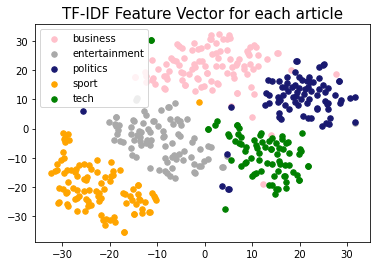

In [46]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

for category, category_id in sorted_category_to_id_items:
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
    plt.title("TF-IDF Feature Vector for each article", fontdict=dict(fontsize=15))
    plt.legend()